In [68]:
import pandas as  pd
import numpy as np
import folium
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df=pd.read_csv("Dataset .csv") 
df.head()   

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Level 2

# Task 1: Restaurant Ratings

# Analyze the distribution of aggregate ratings and determine the most common rating range.

In [70]:
rating_col = "Aggregate rating"
votes_col = "Votes"

In [ ]:
df_clean = df.dropna(subset=[rating_col, votes_col])

In [72]:
# Step 1: Create bins for rating ranges
bins = [0, 1, 2, 3, 4, 5]
labels = ['0–1', '1–2', '2–3', '3–4', '4–5']
df_clean['Rating Range'] = pd.cut(df_clean[rating_col], bins=bins, labels=labels, include_lowest=True)

In [73]:
# Count rating ranges
rating_range_counts = df_clean['Rating Range'].value_counts().sort_index()

In [74]:
# Find the most common rating range
most_common_range = rating_range_counts.idxmax()
most_common_count = rating_range_counts.max()

In [ ]:
print("Distribution of Rating Ranges:")
print(rating_range_counts)
print(f"\nMost Common Rating Range: {most_common_range} ({most_common_count} restaurants)")

Distribution of Rating Ranges:
Rating Range
0–1    2148
1–2      10
2–3    1891
3–4    4388
4–5    1114
Name: count, dtype: int64

Most Common Rating Range: 3–4 (4388 restaurants)


# Calculate the average number of votes received by restaurants.

In [76]:
avg_votes = df_clean[votes_col].mean()
print(f"\nAverage Number of Votes: {avg_votes:.2f}")


Average Number of Votes: 156.91


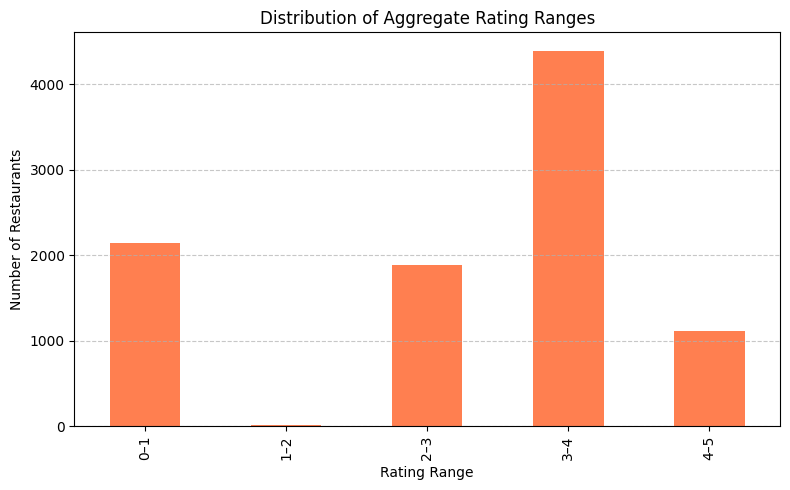

In [77]:
# Plot rating range distribution
plt.figure(figsize=(8, 5))
rating_range_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Aggregate Rating Ranges')
plt.xlabel('Rating Range')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Task 2: Cuisine Combination

# Identify the most common combinations of cuisines in the dataset.

In [78]:
cuisine_col = "Cuisines"
rating_col = "Aggregate rating"

In [ ]:
df_clean = df.dropna(subset=[cuisine_col, rating_col])

In [80]:
# Normalize combinations: sort and strip whitespace
df_clean['Cuisine Combo'] = df_clean[cuisine_col].apply(
    lambda x: ', '.join(sorted([c.strip() for c in x.split(',')]))
)

C:\Users\joyst\AppData\Local\Temp\ipykernel_5716\2159737575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cuisine Combo'] = df_clean[cuisine_col].apply(


In [81]:
df_clean['Cuisine Combo']

0             Desserts, French, Japanese
1                               Japanese
2       Asian, Filipino, Indian, Seafood
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     Cafe, Patisserie, World Cuisine
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisine Combo, Length: 9542, dtype: object

In [82]:
# Count each cuisine combo
combo_counts = df_clean['Cuisine Combo'].value_counts()

In [83]:
# Get the most common cuisine combination
most_common_combo = combo_counts.idxmax()
most_common_count = combo_counts.max()

print(f"Most Common Cuisine Combination: {most_common_combo} ({most_common_count} restaurants)")

Most Common Cuisine Combination: North Indian (936 restaurants)


In [84]:
# Calculate its average rating
combo_avg_rating = df_clean[df_clean['Cuisine Combo'] == most_common_combo][rating_col].mean()
print(f"Average Rating for '{most_common_combo}': {combo_avg_rating:.2f}")

Average Rating for 'North Indian': 1.67


In [85]:
# Optional: Compare it to overall average rating
overall_avg_rating = df_clean[rating_col].mean()
print(f"Overall Average Rating: {overall_avg_rating:.2f}")

Overall Average Rating: 2.67


In [86]:
# Performance comparison
if combo_avg_rating > overall_avg_rating:
    print("This cuisine combination tends to have a higher-than-average rating.")
elif combo_avg_rating < overall_avg_rating:
    print("This cuisine combination tends to have a lower-than-average rating.")
else:
    print("This cuisine combination has a rating equal to the overall average.")


This cuisine combination tends to have a lower-than-average rating.


In [87]:
# Drop rows with missing cuisine information
df_cuisine = df.dropna(subset=['Cuisines'])

# Normalize cuisine combinations (e.g., sorted, stripped of whitespace)
df_cuisine['Cuisine Combination'] = df_cuisine['Cuisines'].apply(
    lambda x: ', '.join(sorted([c.strip() for c in x.split(',')]))
)

# Count the most common cuisine combinations
cuisine_counts = df_cuisine['Cuisine Combination'].value_counts().head(10)

cuisine_counts


C:\Users\joyst\AppData\Local\Temp\ipykernel_5716\3907159444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cuisine['Cuisine Combination'] = df_cuisine['Cuisines'].apply(


Cuisine Combination
North Indian                      936
Chinese, North Indian             616
Mughlai, North Indian             394
Fast Food                         354
Chinese                           354
Chinese, Mughlai, North Indian    306
Cafe                              299
Bakery                            218
Bakery, Desserts                  181
Chinese, Fast Food                159
Name: count, dtype: int64

# Determine if certain cuisine combinations tend to have higher ratings.

In [88]:
avg_ratings = (
    df_cuisine.groupby('Cuisine Combination')['Aggregate rating']
    .agg(['count', 'mean'])
    .sort_values(by='mean', ascending=False)
)

# Filter to show only the top 10 most common combinations
common_combos = cuisine_counts.index
avg_ratings_common = avg_ratings.loc[common_combos].sort_values(by='mean', ascending=False)

avg_ratings_common


,count,mean
Cuisine Combination,,
Cafe,299,2.890970
"Mughlai, North Indian",394,2.767259
"Chinese, Mughlai, North Indian",306,2.619935
"Bakery, Desserts",181,2.375691
"Chinese, North Indian",616,2.333442
Fast Food,354,2.118362
"Chinese, Fast Food",159,2.069811
Chinese,354,2.042090
Bakery,218,1.924312


C:\Users\joyst\AppData\Local\Temp\ipykernel_5716\3658045418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


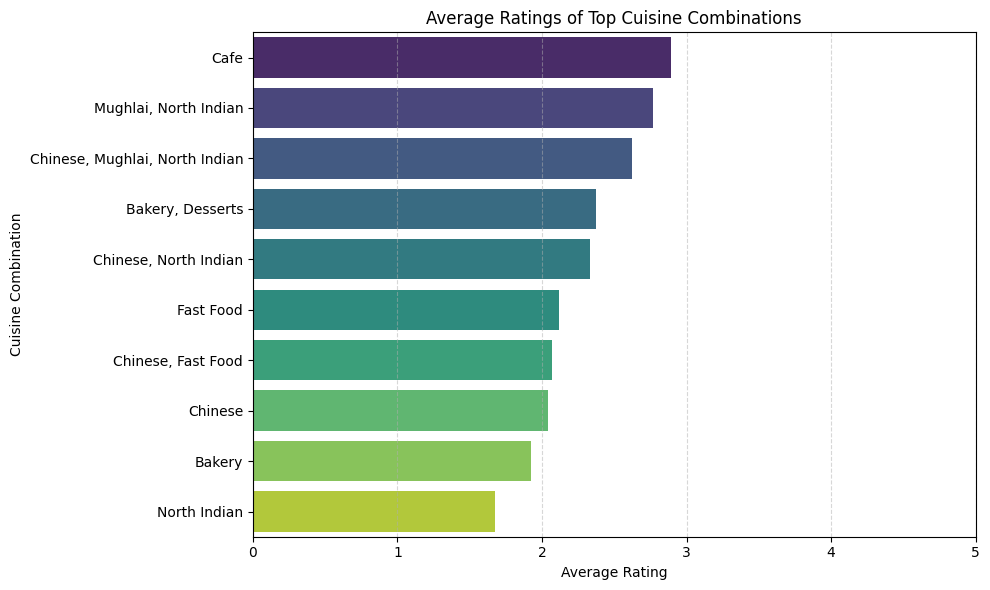

In [89]:
# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_ratings_common['mean'],
    y=avg_ratings_common.index,
    palette="viridis"
)

plt.title('Average Ratings of Top Cuisine Combinations')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Combination')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Level 2

# Task 3: Geographic Analysis

# Identify any patterns or clusters of restaurants in specific areas.

In [ ]:
df = df.dropna(subset=['Latitude', 'Longitude'])

In [91]:
# Convert to float in case data is string
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

In [ ]:
# Center map around average coordinates
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)


In [93]:
# Add points to the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(restaurant_map)

In [94]:
# Save map to HTML
restaurant_map.save("restaurant_map.html")
print("Map saved as restaurant_map.html")

Map saved as restaurant_map.html


In [95]:
# Step 2: Identify clusters with DBSCAN
coords = df[['Latitude', 'Longitude']].values
kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian  # ~0.5 km radius


In [96]:
# Perform DBSCAN clustering
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine')
df['Cluster'] = db.fit_predict(np.radians(coords))

# Plot the locations of restaurants on a map using longitude and latitude coordinates.

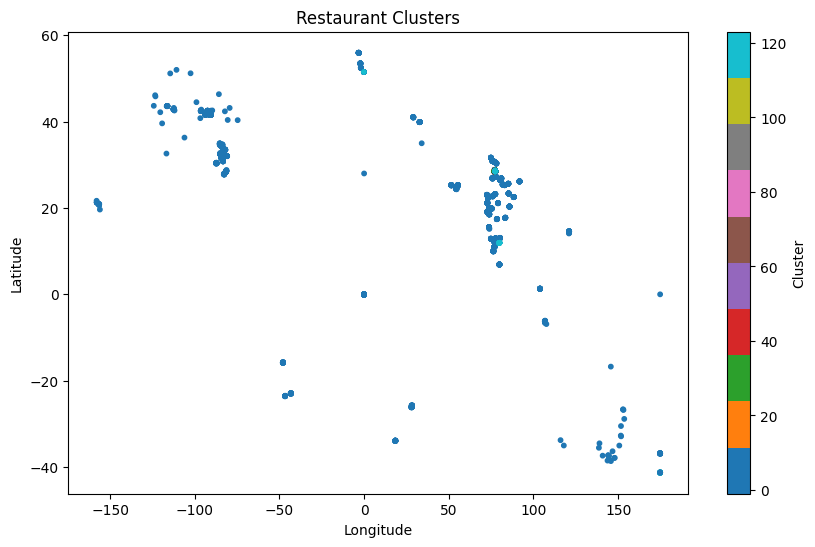

In [97]:
# Plot clusters using matplotlib
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='tab10', s=10)
plt.title("Restaurant Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter, label='Cluster')
plt.show()

# Task 4: Restaurant Chains

# Identify if there are any restaurant chains present in the dataset.

In [98]:
name_col = "Restaurant Name"
rating_col = "Aggregate rating"
votes_col = "Votes"


In [99]:
# Drop missing values in necessary columns
df_clean = df.dropna(subset=[name_col, rating_col, votes_col])

In [100]:
# Step 1: Identify restaurant chains (same name appearing more than once)
chain_counts = df_clean[name_col].value_counts()
restaurant_chains = chain_counts[chain_counts > 1].index
print(f"Number of restaurant chains: {len(restaurant_chains)}")

Number of restaurant chains: 734


# Analyze the ratings and popularity of different restaurant chains.

In [101]:
# Filter only restaurant chains
chain_data = df_clean[df_clean[name_col].isin(restaurant_chains)]

In [102]:
# Step 2: Analyze average rating and popularity
chain_stats = chain_data.groupby(name_col).agg(
    Branches=('Restaurant Name', 'count'),
    Average_Rating=(rating_col, 'mean'),
    Average_Votes=(votes_col, 'mean')
).sort_values(by='Branches', ascending=False)

print("Top Restaurant Chains with Ratings and Popularity:\n")
print(chain_stats.head(10))


Top Restaurant Chains with Ratings and Popularity:

                  Branches  Average_Rating  Average_Votes
Restaurant Name                                          
Cafe Coffee Day         83        2.419277      29.253012
Domino's Pizza          79        2.740506      84.088608
Subway                  63        2.907937      97.206349
Green Chick Chop        51        2.672549      18.901961
McDonald's              48        3.339583     110.229167
Keventers               34        2.870588      37.147059
Pizza Hut               30        3.320000     165.366667
Giani                   29        2.689655      29.448276
Baskin Robbins          28        1.860714      15.285714
Barbeque Nation         26        4.353846    1082.384615
